## Cuadratura de Gauss

La cuadratura Gaussiana es un método numérico utilizado para aproximar la integral definida de una función. La fórmula general de la cuadratura Gaussiana es:

$$ \int_{a}^{b} f(x) \,dx \approx \sum_{i=1}^{n} w_i \cdot f(x_i) $$

donde $x_i$ son los puntos de evaluación y $w_i$ son los pesos asociados.

**Pasos para la cuadratura Gaussiana**

1. **Cambio de variable:**
   Para adaptar la cuadratura Gaussiana a cualquier intervalo $[a, b]$, se realiza un cambio de variable $t$ en el intervalo estándar $[-1, 1]$:

   $$x(t) = \frac{b - a}{2} \cdot t + \frac{a + b}{2}$$

2. **Selección de puntos y pesos:**
   Los puntos de evaluación $x_i$ y los pesos $w_i$ se seleccionan de manera óptima. Para la cuadratura Gaussiana con $n$ puntos, estos se obtienen de las raíces y pesos de los polinomios ortogonales asociados.

3. **Aproximación de la integral:**
   Con los puntos de evaluación y los pesos seleccionados, la integral definida se aproxima utilizando la fórmula de cuadratura Gaussiana:

   $$ \int_{a}^{b} f(x) \,dx \approx \frac{b - a}{2} \sum_{i=1}^{n} w_i \cdot f\left(\frac{b - a}{2} \cdot x_i + \frac{a + b}{2}\right) $$

**Ejemplo con cuadratura Gaussiana de 3 puntos**

Supongamos que queremos aproximar la integral definida de una función $f(x)$ en el intervalo $[a, b]$ utilizando la cuadratura Gaussiana con 3 puntos. La fórmula sería:

$$ \int_{a}^{b} f(x) \,dx \approx \frac{b - a}{2} \left[ w_1 \cdot f\left(\frac{b - a}{2} \cdot x_1 + \frac{a + b}{2}\right) + w_2 \cdot f\left(\frac{b - a}{2} \cdot x_2 + \frac{a + b}{2}\right) + w_3 \cdot f\left(\frac{b - a}{2} \cdot x_3 + \frac{a + b}{2}\right) \right] $$

En este caso, los puntos $x_i$ y los pesos $w_i$ se deben seleccionar según la cuadratura Gaussiana de 3 puntos en el intervalo estándar $[-1, 1]$.


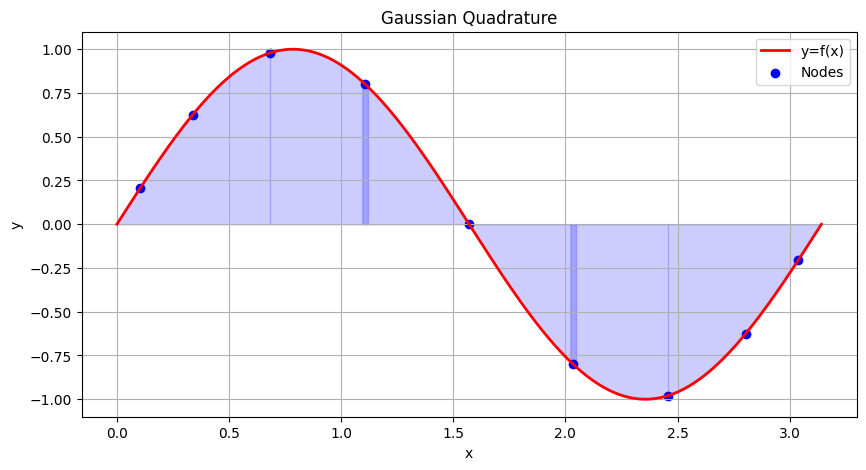

Resultado de la integral (cuadratura gaussiana): 182458284793646.375000
Resultado de la integral (scipy.integrate.quad): 0.000000
Diferencia entre los resultados: 182458284793646.375000


In [10]:
import numpy as np
from numpy.polynomial import legendre as leg
from scipy.integrate import quad
import matplotlib.pyplot as plt

def gauss_quad_manual(func, a, b, n):
    """
    Approximate the integral of a function using Gaussian quadrature.

    Parameters:
    func (function): The function to integrate.
    a (float): The start of the integration interval.
    b (float): The end of the integration interval.
    n (int): The number of nodes to use for the approximation.

    Returns:
    float: The approximate integral of the function over the interval [a, b].
    """
    # Calculate the nodes (roots of the Legendre polynomial)
    nodes = leg.legroots(leg.legder([0]*n + [1]))

    # Calculate the weights
    weights = 2 / ((1 - nodes**2) * (leg.legval(nodes, leg.legder([0]*(n-1) + [1], m=2)))**2)

    # Transform the nodes to the interval [a, b]
    t = 0.5*(nodes + 1)*(b - a) + a

    # Calculate the integral
    integral = np.sum(weights * func(t)) * (b - a) / 2

    return integral


def plot_gauss_quad(func, a, b, n):    
    x = np.linspace(a, b, 1000)
    y = func(x)

    plt.figure(figsize=(10, 5))
    plt.plot(x, y, 'r', linewidth=2, label='y=f(x)')

    # Calculate the nodes and weights
    nodes = leg.legroots(leg.legder([0]*n + [1]))
    weights = 2 / ((1 - nodes**2) * (leg.legval(nodes, leg.legder([0]*(n-1) + [1], m=2)))**2)
    t = 0.5*(nodes + 1)*(b - a) + a

    plt.scatter(t, func(t), color='blue', label='Nodes')
    for i in range(n-1):
        plt.fill_between(x, 0, y, where=(x>=t[i]-weights[i]/2) & (x<=t[i]+weights[i]/2), color='blue', alpha=0.2)

    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Gaussian Quadrature')
    plt.grid(True)
    plt.show()

def main():
    # Define the function to integrate
    f = lambda x: np.sin(2*x)

    # Define the integration limits
    a = 0
    b = np.pi

    # Define the number of points to use in the quadrature
    n = 10

    plot_gauss_quad(f, a, b, n)

    # Calculate the integral using Gaussian quadrature
    integral_gauss = gauss_quad_manual(f, a, b, n)
    print(f"Resultado de la integral (cuadratura gaussiana): {integral_gauss:.6f}")

    # Calculate the integral using scipy.integrate.quad
    integral_quad, _ = quad(f, a, b)
    print(f"Resultado de la integral (scipy.integrate.quad): {integral_quad:.6f}")

    # Calculate and print the difference between the two results
    difference = abs(integral_gauss - integral_quad)
    print(f"Diferencia entre los resultados: {difference:.6f}")

if __name__ == "__main__":
    main()